In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import sys
import os

In [3]:
os.getcwd()

'/Users/tonypalazzolo/Project_1'

In [4]:
csv_path = "Resources/data.csv" ## taken from "popularity" file
music_df = pd.read_csv(csv_path)

In [5]:
csv_path = "Resources/data_w_genres.csv" ## from "popularity" file
genre_df = pd.read_csv(csv_path)

In [6]:
# from "popularity" file
#clean the "artists" column in order to merge the two data sets for further analysis
spec_chars = ["[","]",'"',"'"]
for char in spec_chars:
    music_df['artists'] = music_df['artists'].str.replace(char, '')

In [8]:
merge_genre = music_df.merge(genre_df,on=["artists"],how = "left")
merge_genre.head(20)

,valence_x,year,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,...,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count
0,0.0594,1921,0.9820,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.2110,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.9630,1921,0.7320,Dennis Day,0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,1.970000e-06,0.259680,-11.580400,0.132540,95.256400,0.640600,3.000000,7.0,1.0,10.0
2,0.0394,1921,0.9610,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.1660,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,4.987357e-01,0.148443,-17.178000,0.053462,108.157619,0.101700,2.428571,9.0,1.0,42.0
3,0.1650,1921,0.9670,Frank Parker,0.275,210000,0.3090,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,2.770000e-05,0.381000,-9.316000,0.035400,100.109000,0.165000,3.000000,5.0,1.0,2.0
4,0.2530,1921,0.9570,Phil Regan,0.418,166693,0.1930,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,2.158933e-04,0.195000,-11.083000,0.036000,93.718667,0.220000,1.333333,3.0,1.0,6.0
5,0.1960,1921,0.5790,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.697,395076,0.3460,0,4pyw9DVHGStUre4J6hPngr,0.168000,...,4.987357e-01,0.148443,-17.178000,0.053462,108.157619,0.101700,2.428571,9.0,1.0,42.0
6,0.4060,1921,0.9960,John McCormack,0.518,159507,0.2030,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,...,1.060000e-05,0.107400,-13.036000,0.060380,115.056600,0.287200,1.600000,7.0,1.0,5.0
7,0.0731,1921,0.9930,Sergei Rachmaninoff,0.389,218773,0.0880,0,02GDntOXexBFUvSgaXLPkd,0.527000,...,7.933563e-01,0.236443,-20.485082,0.041968,95.200198,0.264284,4.332090,2.0,1.0,268.0
8,0.7210,1921,0.9960,Ignacio Corsini,0.485,161520,0.1300,0,05xDjWH9ub67nJJk82yfGf,0.151000,...,4.251591e-01,0.182707,-20.862591,0.121051,106.514583,0.638670,0.031847,5.0,1.0,1256.0
9,0.7710,1921,0.9820,Fortugé,0.684,196560,0.2570,0,08zfJvRLp7pjAb94MA9JmF,0.000000,...,1.550000e-07,0.391875,-15.481875,0.151787,103.368375,0.654875,0.000000,10.0,1.0,16.0


In [15]:
# from "popularity" file, edited to include additional metrics and drop "NAN" values
# Create dataframe with only necesary columns
year_df = merge_genre[["year","name","artists","genres", "danceability_x", "energy_x", "explicit", "instrumentalness_x", "liveness_y","loudness_y", "speechiness_y", "tempo_y"]]
year_df.head()
year_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,year,name,artists,genres,danceability_x,energy_x,explicit,instrumentalness_x,liveness_y,loudness_y,speechiness_y,tempo_y
1,1921,Clancy Lowered the Boom,Dennis Day,[],0.819,0.34100,0,0.000000,0.259680,-11.580400,0.132540,95.256400
2,1921,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,[],0.328,0.16600,0,0.913000,0.148443,-17.178000,0.053462,108.157619
3,1921,Danny Boy,Frank Parker,[],0.275,0.30900,0,0.000028,0.381000,-9.316000,0.035400,100.109000
4,1921,When Irish Eyes Are Smiling,Phil Regan,[],0.418,0.19300,0,0.000002,0.195000,-11.083000,0.036000,93.718667
5,1921,Gati Mardika,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,[],0.697,0.34600,0,0.168000,0.148443,-17.178000,0.053462,108.157619
...,...,...,...,...,...,...,...,...,...,...,...,...
170646,2020,NASTY GIRL / ON CAMERA,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",0.598,0.47200,1,0.000015,0.153561,-7.148581,0.206310,125.597886
170647,2020,Med slutna ögon,Najma Wallin,[],0.175,0.00759,0,0.925000,0.113000,-35.072000,0.045400,70.872000
170649,2020,Halloweenie III: Seven Days,Ashnikko,['pop'],0.717,0.75300,0,0.000000,0.190954,-5.923538,0.130662,118.878308
170650,2020,AYA,MAMAMOO,"['k-pop', 'k-pop girl group']",0.634,0.85800,0,0.000009,0.191520,-3.204600,0.096180,108.902000


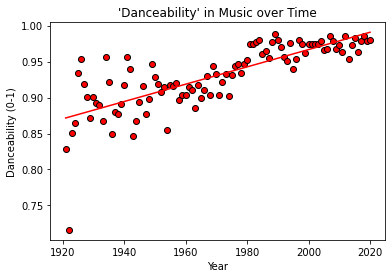

y = 0.0012x + -1.44
r value is 0.6006251161607578


count    100.000000
mean       0.931180
std        0.045074
min        0.716000
25%        0.903000
50%        0.936500
75%        0.970750
max        0.988000
Name: danceability_x, dtype: float64

In [81]:
# From "popularity" file, edited to categorize by maximum established parameters
#groupby years
max_danceability = year_df.groupby(["year"])["danceability_x"].max()
max_danceability = max_danceability.reset_index()

year_by_dan = max_danceability.merge(year_df,on=["year","danceability_x"],how = "left")
year_by_dan

max_danceability_series = pd.Series(max_danceability["year"])
slopemd, interceptmd, rvaluemd, pvaluemd, stderrmd = linregress(max_danceability_series, max_danceability["danceability_x"])
rmd = max_danceability_series* slopemd + interceptmd
line_eq_md = "y = " + str(round(slopemd,4)) + "x + " + str(round(interceptmd,2))
plt.scatter(max_danceability_series,max_danceability["danceability_x"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_danceability_series,rmd,"r-")
plt.title("'Danceability' in Music over Time")
plt.xlabel("Year")
plt.ylabel("Danceability (0-1)") 
plt.savefig("danceability.png")
plt.show()
print(line_eq_md)
print("r value is " + str(rvaluemd**2))
max_danceability["danceability_x"].describe()

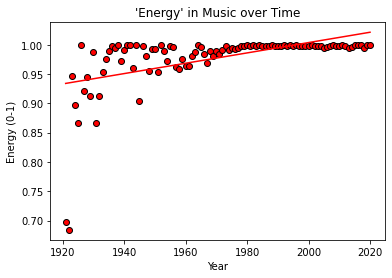

y = 0.0009x + -0.76
r value is 0.2655621358667478


count    100.000000
mean       0.977620
std        0.049656
min        0.684000
25%        0.980000
50%        0.996000
75%        0.998000
max        1.000000
Name: energy_x, dtype: float64

In [83]:
max_energy = year_df.groupby(["year"])["energy_x"].max()
max_energy = max_energy.reset_index()

year_by_energy = max_energy.merge(year_df,on=["year","energy_x"], how = "left")
year_by_energy

max_energy_series = pd.Series(max_energy["year"])
slopeme, interceptme, rvalueme, pvalueme, stderrme = linregress(max_energy_series, max_energy["energy_x"])
rme = max_energy_series* slopeme + interceptme
line_eq_me = "y = " + str(round(slopeme,4)) + "x + " + str(round(interceptme,2))
plt.scatter(max_energy_series,max_energy["energy_x"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_energy_series,rme,"r-")
plt.title("'Energy' in Music over Time")
plt.xlabel("Year")
plt.ylabel("Energy (0-1)") 
plt.savefig("energy.png")
plt.show()
print(line_eq_me)
print("r value is " + str(rvalueme**2))
max_energy["energy_x"].describe()

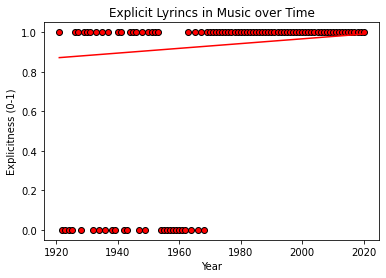

y = 0.0076x + -14.18
r value is 0.2483580998432492


count    100.000000
mean       0.740000
std        0.440844
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: explicit, dtype: float64

In [86]:
max_explicit = year_df.groupby(["year"])["explicit"].max()
max_explicit = max_explicit.reset_index()

year_by_explicit = max_explicit.merge(year_df,on=["year", "explicit"],how = "left")
year_by_explicit

max_explicit_series = pd.Series(max_explicit["year"])
slopemex, interceptmex, rvaluemex, pvaluemex, stderrmex = linregress(max_explicit_series, max_explicit["explicit"])
rmex = max_explicit_series* slopemex + interceptmex
line_eq_mex = "y = " + str(round(slopemex,4)) + "x + " + str(round(interceptmex,2))
plt.scatter(max_explicit_series,max_explicit["explicit"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_explicit_series,rmd,"r-")
plt.title("Explicit Lyrincs in Music over Time")
plt.xlabel("Year")
plt.ylabel("Explicitness (0-1)") 
plt.savefig("explicit.png")
plt.show()
print(line_eq_mex)
print("r value is " + str(rvaluemex**2))
max_explicit["explicit"].describe()

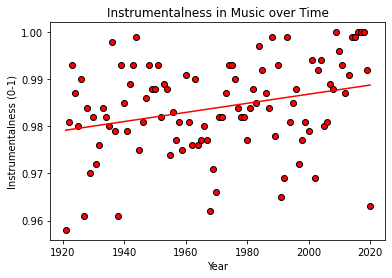

y = 0.0001x + 0.79
r value is 0.08141375479875684


count    100.000000
mean       0.983980
std        0.009853
min        0.958000
25%        0.978750
50%        0.984000
75%        0.992000
max        1.000000
Name: instrumentalness_x, dtype: float64

In [88]:
max_instrumental = year_df.groupby(["year"])["instrumentalness_x"].max()
max_instrumental = max_instrumental.reset_index()

year_by_ins = max_instrumental.merge(year_df,on=["year","instrumentalness_x"])
year_by_ins

max_instrumental_series = pd.Series(max_instrumental["year"])
slopemi, interceptmi, rvaluemi, pvaluemi, stderrmi = linregress(max_instrumental_series, max_instrumental["instrumentalness_x"])
rmi = max_instrumental_series* slopemi + interceptmi
line_eq_mi = "y = " + str(round(slopemi,4)) + "x + " + str(round(interceptmi,2))
plt.scatter(max_instrumental_series,max_instrumental["instrumentalness_x"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_instrumental_series,rmi,"r-")
plt.title("Instrumentalness in Music over Time")
plt.xlabel("Year")
plt.ylabel("Instrumentalness (0-1)") 
plt.savefig("Instrumentalness.png")
plt.show()
print(line_eq_mi)
print("r value is " + str(rvaluemi**2))
max_instrumental["instrumentalness_x"].describe()

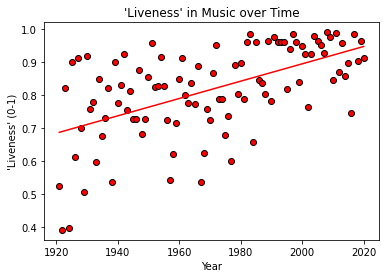

y = 0.0026x + -4.36
r value is 0.310779107084763


count    100.000000
mean       0.817762
std        0.136758
min        0.391875
25%        0.743750
50%        0.837000
75%        0.926000
max        0.991000
Name: liveness_y, dtype: float64

In [89]:
max_live = year_df.groupby(["year"])["liveness_y"].max()
max_live = max_live.reset_index()

year_by_live = max_live.merge(year_df,on=["year", "liveness_y"])
year_by_live
max_liveness_series = pd.Series(max_live["year"])
slopeml, interceptml, rvalueml, pvalueml, stderrml = linregress(max_liveness_series, max_live["liveness_y"])
rml = max_liveness_series* slopeml + interceptml
line_eq_ml = "y = " + str(round(slopeml,4)) + "x + " + str(round(interceptml,2))
plt.scatter(max_liveness_series,max_live["liveness_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_liveness_series,rml,"r-")
plt.title("'Liveness' in Music over Time")
plt.xlabel("Year")
plt.ylabel("'Liveness' (0-1)") 
plt.savefig("Liveness.png")
plt.show()
print(line_eq_ml)
print("r value is " + str(rvalueml**2))
max_live["liveness_y"].describe()

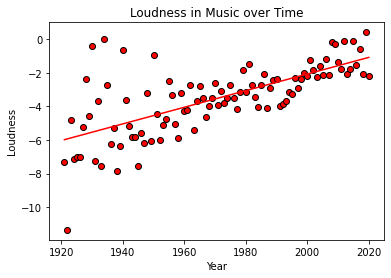

y = 0.0495x + -101.08
r value is 0.4674518163344492


count    100.000000
mean      -3.530222
std        2.100666
min      -11.356000
25%       -4.743750
50%       -3.236500
75%       -2.139500
max        0.418000
Name: loudness_y, dtype: float64

In [90]:
max_loud = year_df.groupby(["year"])["loudness_y"].max()
max_loud = max_loud.reset_index()

year_by_loud = max_loud.merge(year_df,on=["year", "loudness_y"])
year_by_loud

max_loudness_series = pd.Series(max_loud["year"])
slopemlo, interceptmlo, rvaluemlo, pvaluemlo, stderrmlo = linregress(max_loudness_series, max_loud["loudness_y"])
rmlo = max_loudness_series* slopemlo + interceptmlo
line_eq_mlo = "y = " + str(round(slopemlo,4)) + "x + " + str(round(interceptmlo,2))
plt.scatter(max_loudness_series,max_loud["loudness_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_loudness_series,rmlo,"r-")
plt.title("Loudness in Music over Time")
plt.xlabel("Year")
plt.ylabel("Loudness") 
plt.savefig("loudness.png")
plt.show()
print(line_eq_mlo)
print("r value is " + str(rvaluemlo**2))
max_loud["loudness_y"].describe()

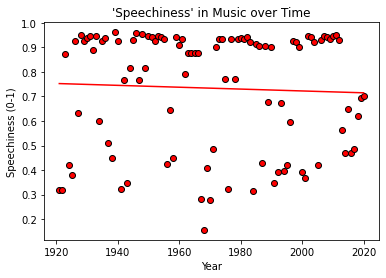

y = -0.0004x + 1.48
r value is 0.0020923931476604287


count    100.000000
mean       0.733701
std        0.240975
min        0.156333
25%        0.480938
50%        0.875242
75%        0.933000
max        0.961651
Name: speechiness_y, dtype: float64

In [91]:
max_speech = year_df.groupby(["year"])["speechiness_y"].max()
max_speech = max_speech.reset_index()

year_by_speech = max_speech.merge(year_df,on=["year","speechiness_y"])
year_by_speech

max_speech_series = pd.Series(max_speech["year"])
slopems, interceptms, rvaluems, pvaluems, stderrms = linregress(max_speech_series, max_speech["speechiness_y"])
rms = max_speech_series* slopems + interceptms
line_eq_ms = "y = " + str(round(slopems,4)) + "x + " + str(round(interceptms,2))
plt.scatter(max_speech_series,max_speech["speechiness_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_speech_series,rms,"r-")
plt.title("'Speechiness' in Music over Time")
plt.xlabel("Year")
plt.ylabel("Speechiness (0-1)") 
plt.savefig("Speechiness.png")
plt.show()
print(line_eq_ms)
print("r value is " + str(rvaluems**2))
max_speech["speechiness_y"].describe()

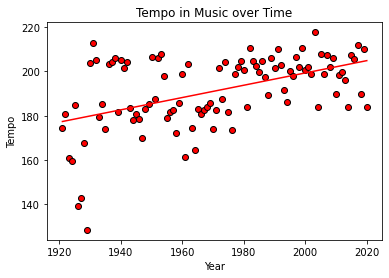

y = 0.2779x + -356.5
r value is 0.23827614068423236


count    100.000000
mean     191.146236
std       16.517814
min      128.378000
25%      182.420750
50%      197.807000
75%      204.147500
max      217.743000
Name: tempo_y, dtype: float64

In [96]:
max_temp = year_df.groupby(["year"])["tempo_y"].max()
max_temp = max_temp.reset_index()

year_by_temp = max_temp.merge(year_df,on=["year","tempo_y"])
year_by_temp

max_tempo_series = pd.Series(max_temp["year"])
slopemt, interceptmt, rvaluemt, pvaluemt, stderrmt = linregress(max_tempo_series, max_temp["tempo_y"])
rmt = max_tempo_series* slopemt + interceptmt
line_eq_mt = "y = " + str(round(slopemt,4)) + "x + " + str(round(interceptmt,2))
plt.scatter(max_tempo_series,max_temp["tempo_y"], marker="o", facecolors="red", edgecolors="black")
plt.plot(max_tempo_series,rmt,"r-")
plt.title("Tempo in Music over Time")
plt.xlabel("Year")
plt.ylabel("Tempo") 
plt.savefig("tempo.png")
plt.show()
print(line_eq_mt)
print("r value is " + str(rvaluemt**2))
max_temp["tempo_y"].describe()

In [ ]:
#decade_2 = year_df.loc[(year_df["year"]>=2010)&(year_df["year"]<=2019)]
